In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from simulation_calibration import BetaCalibrationSimulation

## Different distributions and classifiers

In [6]:
sim = BetaCalibrationSimulation(a=1, b=4, c=0) #m=0.25)

/x/home/zeyusun/work/wip/simulation_calibration.py:429: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / (1 + 1 / (np.exp(self.c) * z ** self.a / (1 - z) ** self.b))


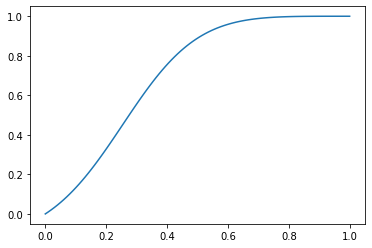

In [3]:
zz = np.linspace(0, 1, 100)
plt.plot(zz, sim.py_given_z(zz))

In [4]:
z, y = sim.generate_data(10000)
fig = px.histogram(z, color=y, marginal="box", barmode='overlay')
# change x label
fig.update_layout(
    xaxis_title="z",
    yaxis_title="count",
    legend_title="y",
    font=dict(
        size=18,
    )
)
fig.write_image("beta_calibration_data.png")

In [8]:
df = sim.run(n_list=np.logspace(3, 7, 5, dtype=int),
             B_list=np.logspace(1, 3.3, 7, dtype=int),
             i_list=np.arange(10))

cal vs. B 0.9870438382953604
cal vs. n -0.9719712202490796
sha vs. B -2.002290883376131


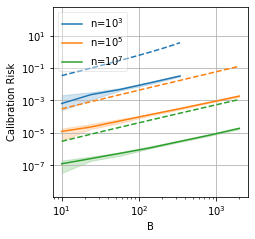

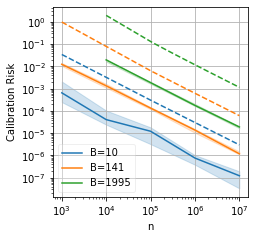

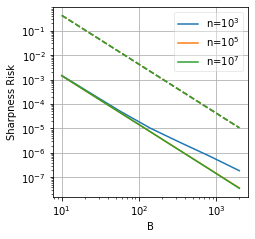

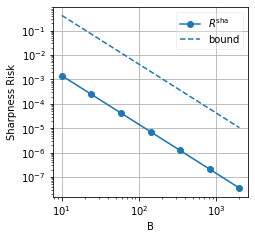

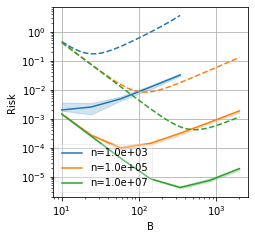

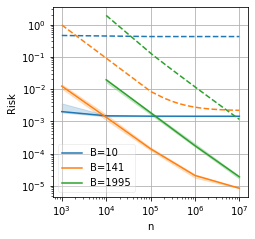

<Figure size 252x252 with 0 Axes>

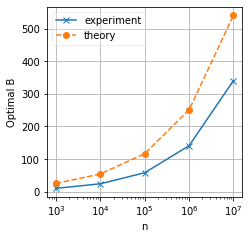

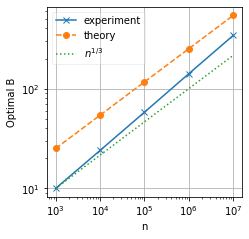

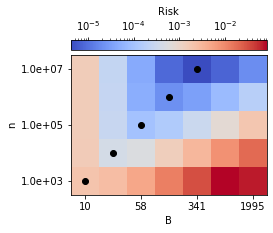

In [10]:
sim.plot(df)

In [9]:
sim.K

2.3020539010243106

/x/home/zeyusun/work/wip/simulation_calibration.py:428: RuntimeWarning:

divide by zero encountered in true_divide



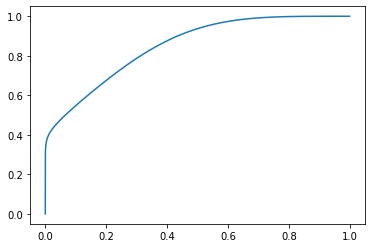

In [ ]:
zz = np.linspace(0, 1, 100000)
plt.plot(zz, sim.py_given_z(zz), label='p(y=1|z)')

In [ ]:
sim.plot

## More classifiers

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from calibration import HistogramCalibrator
from simulation_label_shift import GaussianMixture
from simulation_calibration import GaussianMixtureSimulation

%load_ext autoreload
%autoreload 2

In [30]:
from trash import CompareClassifiersSimulation
data = GaussianMixture()
sim = CompareClassifiersSimulation(data)
df = sim.run(n_list=np.logspace(3, 7, 5, dtype=int),
        B_list=np.logspace(1, 4, 7, dtype=int),
        i_list=np.arange(5))

KeyboardInterrupt: 

In [39]:
data = GaussianMixture()
sim = CompareClassifiersSimulation(data)
sim.classifiers.pop('Logistic')
sim.classifiers.pop('Decision Tree')
df = sim.run(n_list=[10000],
        B_list=np.logspace(1, 4, 7, dtype=int),
        i_list=np.arange(5))
df

cal       sha      risk       ref        bs      n      B  i  \
0   0.000033  0.003495  0.003528  0.017174  0.020697  10000     10  0   
1   0.000021  0.003098  0.003119  0.017140  0.020239  10000     10  1   
2   0.000029  0.004791  0.004820  0.017111  0.021958  10000     10  2   
3   0.000014  0.003732  0.003746  0.017118  0.020863  10000     10  3   
4   0.000006  0.003328  0.003334  0.017123  0.020483  10000     10  4   
5   0.000027  0.001049  0.001076  0.017174  0.018247  10000     31  0   
6   0.000101  0.000895  0.000995  0.017140  0.018152  10000     31  1   
7   0.000028  0.000944  0.000972  0.017111  0.018095  10000     31  2   
8   0.000042  0.000917  0.000959  0.017118  0.018070  10000     31  3   
9   0.000037  0.000945  0.000982  0.017123  0.018116  10000     31  4   
10  0.000121  0.000124  0.000245  0.017174  0.017413  10000    100  0   
11  0.000171  0.000098  0.000268  0.017140  0.017409  10000    100  1   
12  0.000091  0.000127  0.000218  0.017111  0.017332  10000    100  2   
13  0.000119  0.000095  0.000215  0.017118  0.017329  10000    100  3   
14  0.000073  0.000129  0.000202  0.017123  0.017333  10000    100  4   
15  0.000281  0.000203  0.000484  0.017174  0.017654  10000    316  0   
16  0.000506  0.000210  0.000717  0.017140  0.017868  10000    316  1   
17  0.000228  0.000113  0.000341  0.017111  0.017453  10000    316  2   
18  0.000371  0.000126  0.000498  0.017118  0.017614  10000    316  3   
19  0.000472  0.000223  0.000696  0.017123  0.017824  10000    316  4   
20  0.000092  0.001656  0.001748  0.017174  0.018929  10000   1000  0   
21  0.000164  0.001521  0.001685  0.017140  0.018843  10000   1000  1   
22  0.000278  0.001704  0.001982  0.017111  0.019108  10000   1000  2   
23  0.000153  0.001466  0.001618  0.017118  0.018728  10000   1000  3   
24  0.000246  0.001434  0.001680  0.017123  0.018803  10000   1000  4   
25  0.000489  0.003989  0.004477  0.017174  0.021648  10000   3162  0   
26  0.000408  0.004849  0.005257  0.017140  0.022401  10000   3162  1   
27  0.000455  0.004878  0.005332  0.017111  0.022467  10000   3162  2   
28  0.000480  0.004682  0.005162  0.017118  0.022281  10000   3162  3   
29  0.000539  0.005579  0.006118  0.017123  0.023246  10000   3162  4   
30  0.002372  0.013371  0.015743  0.017174  0.032938  10000  10000  0   
31  0.002724  0.013479  0.016203  0.017140  0.033355  10000  10000  1   
32  0.002862  0.015375  0.018236  0.017111  0.035384  10000  10000  2   
33  0.002885  0.013578  0.016463  0.017118  0.033554  10000  10000  3   
34  0.003002  0.014916  0.017918  0.017123  0.035040  10000  10000  4   

     classifier  
0   Naive Bayes  
1   Naive Bayes  
2   Naive Bayes  
3   Naive Bayes  
4   Naive Bayes  
5   Naive Bayes  
6   Naive Bayes  
7   Naive Bayes  
8   Naive Bayes  
9   Naive Bayes  
10  Naive Bayes  
11  Naive Bayes  
12  Naive Bayes  
13  Naive Bayes  
14  Naive Bayes  
15  Naive Bayes  
16  Naive Bayes  
17  Naive Bayes  
18  Naive Bayes  
19  Naive Bayes  
20  Naive Bayes  
21  Naive Bayes  
22  Naive Bayes  
23  Naive Bayes  
24  Naive Bayes  
25  Naive Bayes  
26  Naive Bayes  
27  Naive Bayes  
28  Naive Bayes  
29  Naive Bayes  
30  Naive Bayes  
31  Naive Bayes  
32  Naive Bayes  
33  Naive Bayes  
34  Naive Bayes

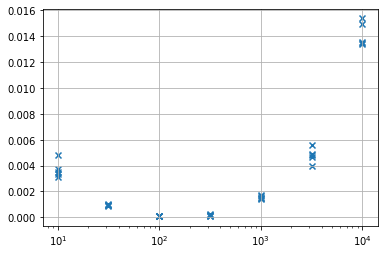

In [43]:
plt.scatter(df['B'], df['sha'], marker='x')
plt.grid()
plt.xscale('log')

In [48]:
from simulation_calibration import evaluate_sample
from calibration import OracleCalibrator


n, B = 10000, 1000
x_cal, y_cal = sim.data.sample(n, 'xy')
x_test, y_test = sim.data.sample(10**7, 'xy')
results = []
clf_name = 'Naive Bayes'
clf = sim.classifiers[clf_name]
calibrator = OracleCalibrator(py_given_z=sim.data.py_given_z)
# calibrator.fit(clf.predict_proba(x_cal.reshape(-1, 1))[:, 1], y_cal)

z_pred = calibrator.predict(clf.predict_proba(x_test.reshape(-1, 1))[:, 1])
z_true = sim.data.py_given_x(x_test)
metrics = evaluate_sample(z_pred, z_true, y=y_test)
metrics.update({'n': n, 'B': B, 'i': i, 'classifier': clf_name})
results.append(metrics)

/x/home/zeyusun/work/wip/utils.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [49]:
results

[{'cal': 0.01844477578391966,
  'sha': nan,
  'risk': 0.018477992975119376,
  'ref': 0.017129968902744364,
  'bs': 0.03556635602837824,
  'n': 10000,
  'B': 1000,
  'i': 9,
  'classifier': 'Naive Bayes'}]

In [24]:
from simulation_calibration import evaluate_sample
n_train = 1000
n, B, i = 10000, 100, 0


np.random.seed(i)
x_train, y_train = sim.data.sample(n_train, 'xy')
x_cal, y_cal = sim.data.sample(n, 'xy')
x_test, y_test = sim.data.sample(10**7, 'xy')
results = []
for clf_name, clf in sim.classifiers.items():
    clf.fit(x_train.reshape(-1, 1), y_train)
    calibrator = HistogramCalibrator(n_bins=B, strategy='quantile')
    calibrator.fit(clf.predict_proba(x_cal.reshape(-1, 1))[:, 1], y_cal)

    z_pred = calibrator.predict(clf.predict_proba(x_test.reshape(-1, 1))[:, 1])
    z_true = sim.data.py_given_x(x_test)
    metrics = evaluate_sample(z_pred, z_true, y=y_test)
    metrics.update({'n': n, 'B': B, 'i': i, 'classifier': clf_name})
    results.append(metrics)
pd.DataFrame(results)

cal       sha      risk       ref        bs      n    B  i  \
0  0.000130  0.000127  0.000258  0.017174  0.017436  10000  100  0   
1  0.000130  0.000127  0.000258  0.017174  0.017436  10000  100  0   
2  0.000075  0.003168  0.003243  0.017174  0.020441  10000  100  0   

      classifier  
0       Logistic  
1    Naive Bayes  
2  Decision Tree

In [28]:
df.shape

(525, 9)

In [29]:
np.unique(df['classifier'])

array(['Decision Tree', 'Logistic', 'Naive Bayes'], dtype=object)

Decision Tree
cal vs. B 0.26261638598568804


/x/home/zeyusun/work/wip/trash.py:76: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/x/home/zeyusun/work/wip/trash.py:77: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



cal vs. n -1.0258376918199503
sha vs. B -0.1723561887609624
Logistic
cal vs. B 0.7494542468516473


/x/home/zeyusun/work/wip/trash.py:76: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/x/home/zeyusun/work/wip/trash.py:77: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



cal vs. n -0.8126866650119537
sha vs. B -1.15720492554412
Naive Bayes
cal vs. B 0.7614181993621413


/x/home/zeyusun/work/wip/trash.py:76: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/x/home/zeyusun/work/wip/trash.py:77: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/x/home/zeyusun/work/wip/trash.py:83: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



cal vs. n -0.8425063870177273
sha vs. B -1.091192482291496


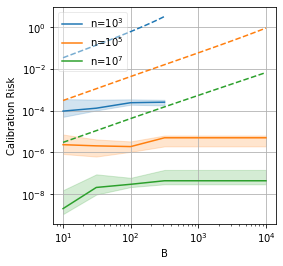

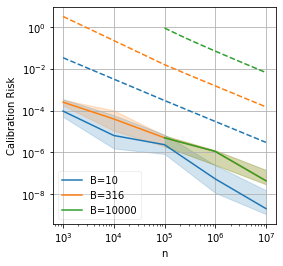

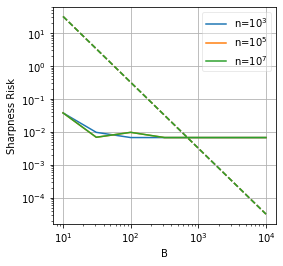

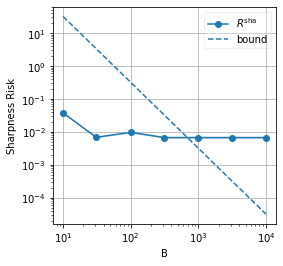

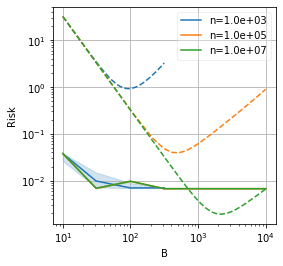

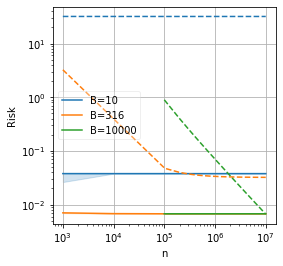

<Figure size 288x288 with 0 Axes>

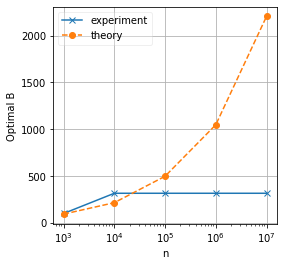

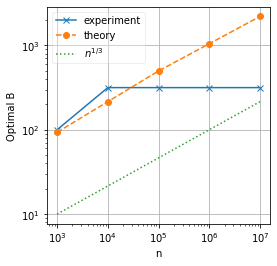

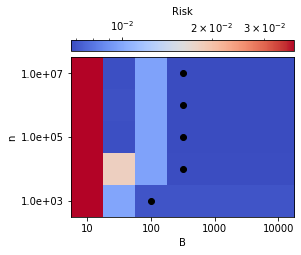

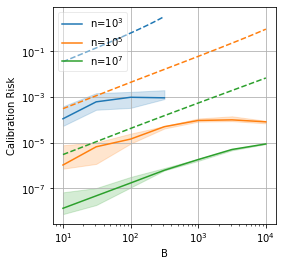

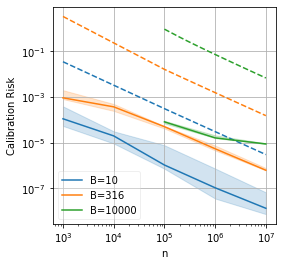

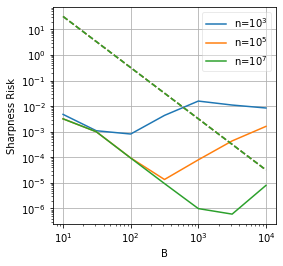

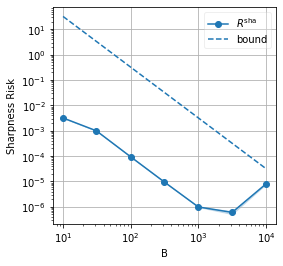

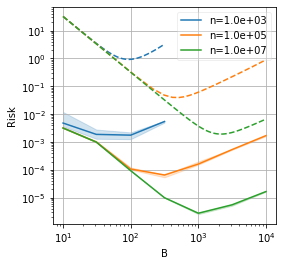

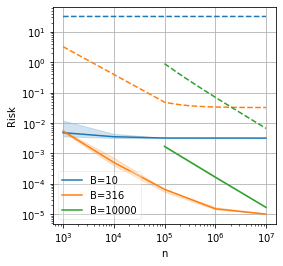

<Figure size 288x288 with 0 Axes>

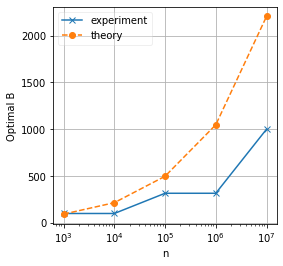

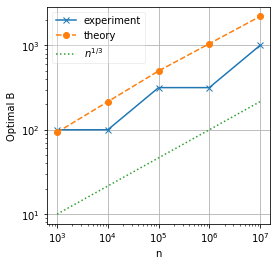

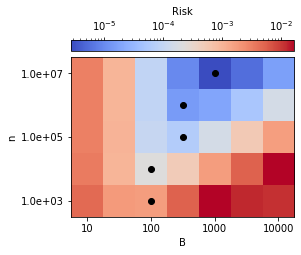

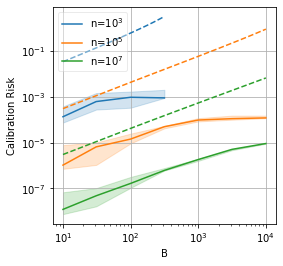

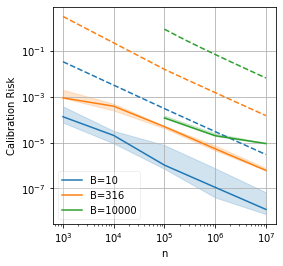

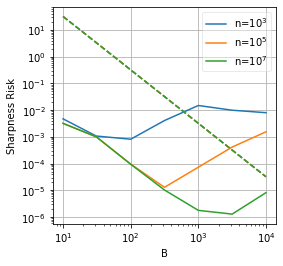

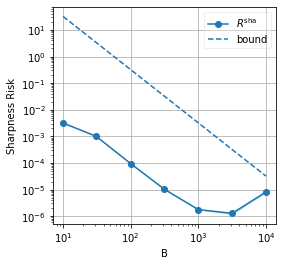

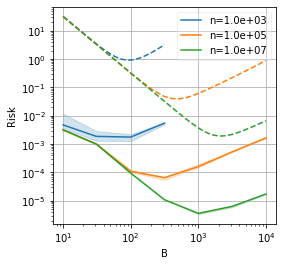

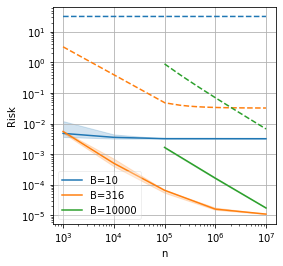

<Figure size 288x288 with 0 Axes>

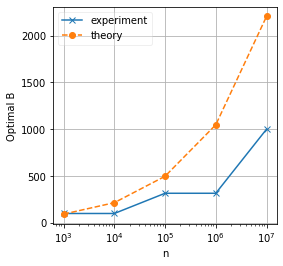

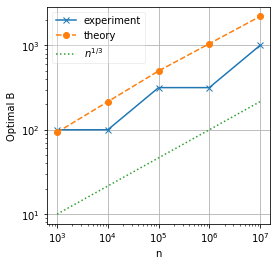

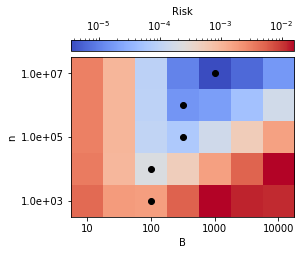

In [49]:
for clf_name in np.unique(df['classifier']):
    print(clf_name)
    sim.plot(df[df['classifier'] == clf_name], folder=clf_name)

In [16]:
bin_count = np.bincount(bin_ids)
bin_count

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [17]:
x_cal, y_cal = sim.data.sample(n, 'xy')
x_test, y_test = self.data.sample(10**7, 'xy')
results = []
for clf_name, clf in self.classifiers.items():
    calibrator = HistogramCalibrator(n_bins=B, strategy='quantile')
    calibrator.fit(clf.predict_proba(x_cal.reshape(-1, 1))[:, 1], y_cal)

    z_pred = calibrator.predict(clf.predict_proba(x_test.reshape(-1, 1))[:, 1])
    z_true = self.data.py_given_x(x_test)
    metrics = evaluate_sample(z_pred, z_true, y=y_test)
    metrics.update({'n': n, 'B': B, 'i': i, 'classifier': clf_name})
    results.append(metrics)
return results

0.175

In [18]:
bins

array([0.        , 0.07717472, 0.17276402, 0.20669333, 0.35960771,
       0.46629537, 0.52073991, 0.68999075, 0.78703563, 0.93976168,
       1.1       ])

In [24]:
class SimData:
    def sample(self, n):
        z = np.random.rand(n)
        y = np.random.binomial(1, z)
        return z, y

    def py_given_z(self, z):
        return z

    def pz(self, z):
        return 1

In [27]:
from calibration import HistogramCalibrator
from simulation_calibration import evaluate_quadrature

sim = SimData()
z, y = sim.sample(1000)

calibrator = HistogramCalibrator(n_bins=100, strategy='quantile')
calibrator.fit(z, y)

evaluate_quadrature(calibrator, sim.py_given_z, sim.pz)

{'cal': 0.014381482931316317,
 'sha': 1.0311053298104423e-05,
 'ref': 0.16666666666666669,
 'risk': 0.014391793984614421,
 'bs': 0.18105846065128112}

In [ ]:
z_calibrated = calibrator.predict(z)
evaluate_sample(calibrator.predict(sim.py_given_z(z)), sim.py_given_z(z), y)

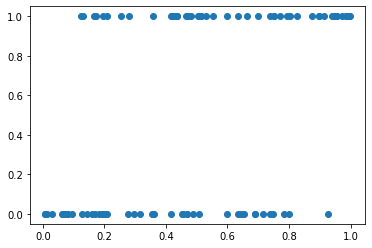

In [15]:
B = 10
res = []
for n in np.logspace(3, 7, 5, dtype=int):
    z = np.random.rand(n)
    bins = np.quantile(z, np.linspace(0, 1, B+1))
    bins[0], bins[-1] = 0, 1 + 1e-10
    bin_ids = np.digitize(z, bins) - 1
    y = np.random.binomial(1, z)
    res.append({
        'both_plugin': np.mean([np.var(y[bin_ids==i]) for i in range(B)]),
        'bin_plugin': 1 / (bins[1:] - bins[:-1])**2 / 12,
        'bin_ids':

In [13]:
y.mean(), y.var(ddof=1), np.mean((y - y.mean())**2)

(0.6, 0.26666666666666666, 0.24)

plugin estimates is biased downwards (underestimate)

In [35]:
ddf = df[df['classifier'] == 'Logistic'].groupby(['n', 'B']).mean()

In [16]:
data = GaussianMixture(mu=1)
n = 1000
x, y = data.sample(n, 'xy')
px.histogram(x, color=y, marginal="box", barmode='overlay').show()

In [133]:
classifiers = {
    # 'oracle': p(y|x),
    'lr': LogisticRegression(),
    'nb': GaussianNB(),
    'dt': DecisionTreeClassifier(max_depth=3),
    # 'Naive Bayes': GaussianNB(),
    # 'Decision Tree': DecisionTreeClassifier(max_depth=3),
}
for name, model in classifiers.items():
    model.fit(x.reshape(-1, 1), y)
    print(name, model.score(x.reshape(-1, 1), y))

lr 0.843
nb 0.846
dt 0.85


In [134]:
calibrators = {}
x_cal, y_cal = data.sample(n)
for clf_name, clf in classifiers.items():
    cal = HistogramCalibrator(n_bins=10, strategy='quantile')
    cal.fit(clf.predict_proba(x_cal.reshape(-1, 1))[:, 1], y_cal)
    calibrators[clf_name] = cal

In [48]:
import plotly.graph_objects as go
z_cal = classifiers['dt'].predict_proba(x.reshape(-1, 1))[:, 1]
fig = px.histogram(z_cal, color=y, marginal="box", barmode='overlay')
fig.add_trace(
    go.Scatter(x=z_cal, y=calibrators['dt'].predict(z_cal), mode='markers', name='calibrated'),
    # row=2, col=1,
    # secondary_y=True,
)

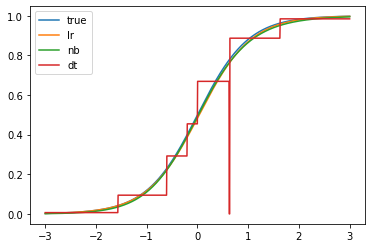

In [135]:
xx = np.linspace(-3, 3, 1000)
p_true = data.py_given_x(xx)
plt.plot(xx, p_true, label='true')
for name, clf in classifiers.items():
    p = clf.predict_proba(xx.reshape(-1, 1))[:, 1]
    plt.plot(xx, p, label=name)
plt.legend()

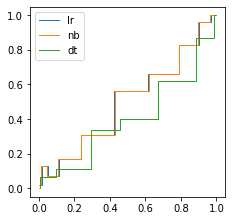

In [139]:
# oracle = OracleCalibrator(sim.py_given_z())
for name, cal in calibrators.items():
    cal.plot(label=name)
plt.legend(loc='upper left')

In [140]:
x_test, y_test = data.sample(10**7)
z_true = data.py_given_x(x_test)
results = {}
for clf_name, clf in classifiers.items():
    z = clf.predict_proba(x_test.reshape(-1, 1))[:, 1]
    z = calibrators[clf_name].predict(z)
    results[clf_name] = evaluate_sample(z, z_true, y=y_test)

In [141]:
pd.DataFrame(results).T.style.background_gradient(cmap='Blues')